epochs = 15
batch_size = 100
5 layers
target_size = (126, 126)

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from tensorflow import keras
import numpy as np

In [13]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_data.flow_from_directory(
    directory = 'Animal_faces/train',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype)
    print(y_train.shape, y_train.dtype)
    break

Found 14630 images belonging to 3 classes.
(64, 154, 154, 3) float32
(64, 3) float32


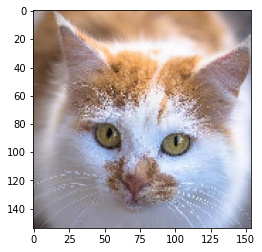

In [14]:
plt.imshow(x_train[12])

In [15]:
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory = 'Animal_faces/val',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)

Found 1500 images belonging to 3 classes.


In [16]:
(255/3)*2

170.0

In [17]:
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype)
    print(y_test.shape, y_test.dtype)
    break

(64, 154, 154, 3) float32
(64, 3) float32


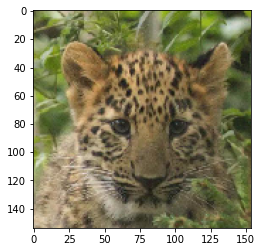

In [18]:

plt.imshow(x_test[2])

# Traditional

In [19]:
animal_c = keras.models.Sequential()
animal_c.add(keras.layers.InputLayer(input_shape=(154, 154, 3)))
animal_c.add(keras.layers.Flatten())
animal_c.add(keras.layers.Dense(units = 48, activation='relu'))
animal_c.add(keras.layers.Dense(units = 32, activation='relu'))
animal_c.add(keras.layers.Dense(units = 16, activation='relu'))
# animal_c.add(keras.layers.Dense(units = 16, activation='relu'))
animal_c.add(keras.layers.Dense(units=3, activation='softmax'))
animal_c.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 71148)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                3415152   
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 3,417,299
Trainable params: 3,417,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
animal_c.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics= keras.metrics.CategoricalAccuracy()
)

In [ ]:
result = animal_c.fit_generator(
    generator= train_generator,
    epochs=15, #last one was 10
    steps_per_epoch=14630//64,
    validation_steps=1500/64,
    validation_data=test_generator)

In [ ]:
result.history.keys()

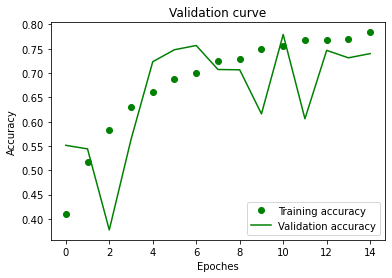

In [15]:
plt.plot(result.history['categorical_accuracy'], 'go', label='Training accuracy')
plt.plot(result.history['val_categorical_accuracy'], 'g-', label='Validation accuracy')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

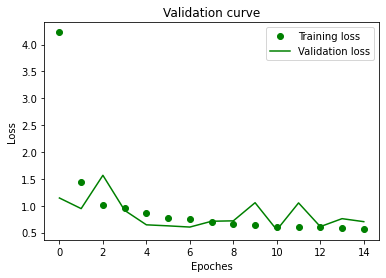

In [16]:
plt.plot(result.history['loss'], 'go', label='Training loss')
plt.plot(result.history['val_loss'], 'g-', label='Validation loss')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Convolutional

In [7]:
animal_c = keras.models.Sequential()
animal_c.add(keras.layers.InputLayer(input_shape=(154, 154, 3)))
animal_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 48, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 96, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))

animal_c.add(keras.layers.Flatten())
animal_c.add(keras.layers.Dense(units=96, activation='relu'))
animal_c.add(keras.layers.Dense(units=3, activation='softmax'))
animal_c.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 152, 152, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        5

2022-06-24 01:00:05.826954: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-24 01:00:05.861216: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 3000080000 Hz
2022-06-24 01:00:05.867884: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5594783e37c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-24 01:00:05.867992: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [8]:
animal_c.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics= keras.metrics.CategoricalAccuracy()
)

In [9]:
# test 1
# result = animal_c.fit_generator(
#     generator= train_generator,
#     epochs=10,
#     steps_per_epoch=2000//15,
#     validation_steps=25,
#     validation_data=test_generator)

#test2
result = animal_c.fit_generator(
    generator= train_generator,
    epochs=15, #last one was 10
    steps_per_epoch=14630//64,
    validation_steps=1500/64,
    validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
228/228 [==============================] - 206s 904ms/step - loss: 0.8391 - categorical_accuracy: 0.6224 - val_loss: 0.8878 - val_categorical_accuracy: 0.5967
Epoch 2/15
228/228 [==============================] - 228s 999ms/step - loss: 0.5137 - categorical_accuracy: 0.7922 - val_loss: 0.4162 - val_categorical_accuracy: 0.8487
Epoch 3/15
228/228 [==============================] - 217s 951ms/step - loss: 0.3648 - categorical_accuracy: 0.8643 - val_loss: 0.3834 - val_categorical_accuracy: 0.8440
Epoch 4/15
228/228 [==============================] - 227s 995ms/step - loss: 0.2775 - categorical_accuracy: 0.8988 - val_loss: 0.2394 - val_categorical_accuracy: 0.9147
Epoch 5/15
228/228 [==============================] - 233s 1s/step - loss: 0.2241 - categorical_accuracy: 0.9195 - val_loss: 0.2195 - val_categorical_accuracy: 0.9207
Epoch 6/15
228/228 [==============================] - 244s 1s/step - loss: 0.

In [10]:
result.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

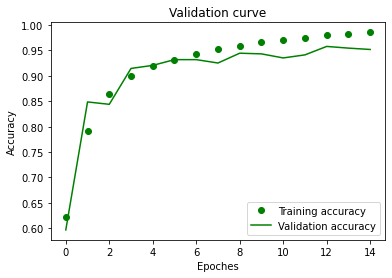

In [11]:
plt.plot(result.history['categorical_accuracy'], 'go', label='Training accuracy')
plt.plot(result.history['val_categorical_accuracy'], 'g-', label='Validation accuracy')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")
plt.show()

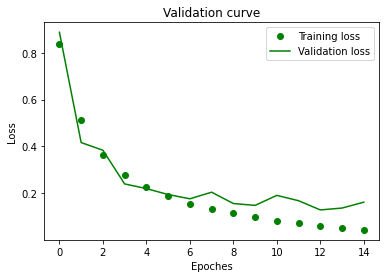

In [12]:
plt.plot(result.history['loss'], 'go', label='Training loss')
plt.plot(result.history['val_loss'], 'g-', label='Validation loss')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

As accuracy is high enough at epochs 8, we can apply regularization method by early stopping.

# Augmentation with 15 epochs

In [13]:
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    zoom_range= 0.1,
#     width_shift_range=0.1,
    rotation_range=10,
#     height_shift_range=0.1,
)

In [14]:
train_generator = train_data.flow_from_directory(
    directory = 'Animal_faces/train',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)

Found 14630 images belonging to 3 classes.


In [ ]:
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory = 'Animal_faces/val',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)

In [15]:
animal_c = keras.models.Sequential()
animal_c.add(keras.layers.InputLayer(input_shape=(154, 154, 3)))
animal_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 48, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 96, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))

animal_c.add(keras.layers.Flatten())
animal_c.add(keras.layers.Dense(units=96, activation='relu'))
animal_c.add(keras.layers.Dense(units=3, activation='softmax'))
animal_c.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 152, 152, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 74, 74, 48)        13872     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 48)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 64)        27712     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 96)       

In [16]:
animal_c.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics= keras.metrics.CategoricalAccuracy()
)

In [17]:
result2 = animal_c.fit_generator(
    generator= train_generator,
    epochs=15, #last one was 10
    steps_per_epoch=14630//64,
    validation_steps=1500/64,
    validation_data=test_generator)

Epoch 1/15
228/228 [==============================] - 387s 2s/step - loss: 0.8536 - categorical_accuracy: 0.6141 - val_loss: 0.6434 - val_categorical_accuracy: 0.7207
Epoch 2/15
228/228 [==============================] - 416s 2s/step - loss: 0.5378 - categorical_accuracy: 0.7857 - val_loss: 0.5143 - val_categorical_accuracy: 0.7840
Epoch 3/15
228/228 [==============================] - 400s 2s/step - loss: 0.4043 - categorical_accuracy: 0.8481 - val_loss: 0.3326 - val_categorical_accuracy: 0.8707
Epoch 4/15
228/228 [==============================] - 402s 2s/step - loss: 0.3162 - categorical_accuracy: 0.8801 - val_loss: 0.3017 - val_categorical_accuracy: 0.8840
Epoch 5/15
228/228 [==============================] - 422s 2s/step - loss: 0.2687 - categorical_accuracy: 0.9002 - val_loss: 0.3316 - val_categorical_accuracy: 0.8820
Epoch 6/15
228/228 [==============================] - 319s 1s/step - loss: 0.2265 - categorical_accuracy: 0.9156 - val_loss: 0.2132 - val_categorical_accuracy: 0.923

In [18]:
result2.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

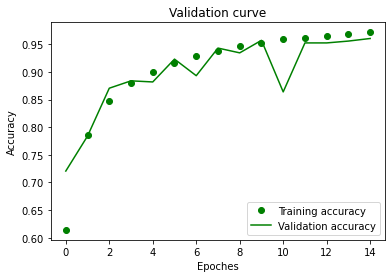

In [19]:
plt.plot(result2.history['categorical_accuracy'], 'go', label='Training accuracy')
plt.plot(result2.history['val_categorical_accuracy'], 'g-', label='Validation accuracy')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")
plt.show()

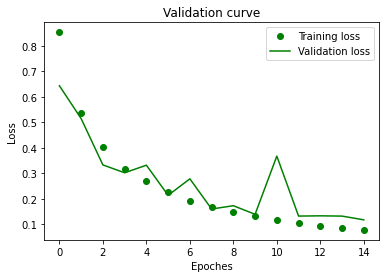

In [20]:
plt.plot(result2.history['loss'], 'go', label='Training loss')
plt.plot(result2.history['val_loss'], 'g-', label='Validation loss')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Augmentation with 9 epochs

In [2]:
train_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    zoom_range= 0.1,
#     width_shift_range=0.1,
    rotation_range=10,
#     height_shift_range=0.1,
)

In [3]:
train_generator = train_data.flow_from_directory(
    directory = 'Animal_faces/train',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)

Found 14630 images belonging to 3 classes.


In [4]:
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = test_data.flow_from_directory(
    directory = 'Animal_faces/val',
    batch_size = 64,    #=> 20<batch_size<100 is OK
    color_mode = 'rgb',
    target_size = (154, 154),
    class_mode = 'categorical'
)

Found 1500 images belonging to 3 classes.


In [5]:
animal_c = keras.models.Sequential()
animal_c.add(keras.layers.InputLayer(input_shape=(154, 154, 3)))
animal_c.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 48, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2))) 
animal_c.add(keras.layers.Conv2D(filters = 96, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))
animal_c.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation='relu')) 
animal_c.add(keras.layers.MaxPooling2D(pool_size = (2,2), padding='same', strides=(2, 2)))

animal_c.add(keras.layers.Flatten())
animal_c.add(keras.layers.Dense(units=96, activation='relu'))
animal_c.add(keras.layers.Dense(units=3, activation='softmax'))
animal_c.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 152, 152, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 76, 76, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        5

2022-06-24 09:21:39.017529: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-24 09:21:39.109471: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 3000080000 Hz
2022-06-24 09:21:39.116073: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b837f8a140 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-24 09:21:39.116131: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [6]:
animal_c.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics= keras.metrics.CategoricalAccuracy()
)

In [8]:
result2 = animal_c.fit_generator(
    generator= train_generator,
    epochs=9, #last one was 10
    steps_per_epoch=14630//64,
    validation_steps=1500/64,
    validation_data=test_generator)

Epoch 1/9
228/228 [==============================] - 337s 1s/step - loss: 0.8300 - categorical_accuracy: 0.6324 - val_loss: 0.7520 - val_categorical_accuracy: 0.6827
Epoch 2/9
228/228 [==============================] - 346s 2s/step - loss: 0.5082 - categorical_accuracy: 0.8027 - val_loss: 0.3777 - val_categorical_accuracy: 0.8560
Epoch 3/9
228/228 [==============================] - 359s 2s/step - loss: 0.3759 - categorical_accuracy: 0.8599 - val_loss: 0.3269 - val_categorical_accuracy: 0.8787
Epoch 4/9
228/228 [==============================] - 352s 2s/step - loss: 0.3037 - categorical_accuracy: 0.8869 - val_loss: 0.2487 - val_categorical_accuracy: 0.9087
Epoch 5/9
228/228 [==============================] - 365s 2s/step - loss: 0.2505 - categorical_accuracy: 0.9065 - val_loss: 0.2701 - val_categorical_accuracy: 0.8933
Epoch 6/9
228/228 [==============================] - 339s 1s/step - loss: 0.2134 - categorical_accuracy: 0.9215 - val_loss: 0.2999 - val_categorical_accuracy: 0.8900
Epoc

In [9]:
result2.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

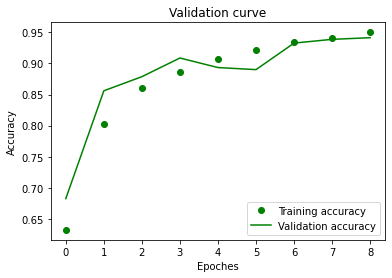

In [10]:

plt.plot(result2.history['categorical_accuracy'], 'go', label='Training accuracy')
plt.plot(result2.history['val_categorical_accuracy'], 'g-', label='Validation accuracy')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")
plt.show()

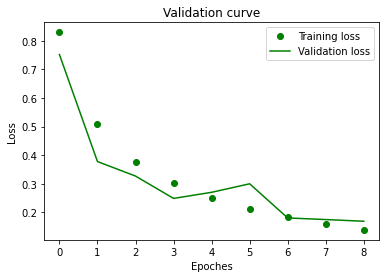

In [11]:
plt.plot(result2.history['loss'], 'go', label='Training loss')
plt.plot(result2.history['val_loss'], 'g-', label='Validation loss')
plt.title('Validation curve')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()